In [1]:
# Exemplo 1 - Cluster
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Criando o conjunto de dados
data = {
    'Simbolo':['AAPL','GOOGL','MSFT','AMZN','TSLA','FB'],
    'Preço da Ação':[150.12,2700.45,300.89,3200.10,700.78,350.40],
    'Volume de Negociação':[3000000,10000000,2500000,1200000,500000,900000],
    'Capitalização de Mercado':[2e12,18e12,22e12,17e12,75e12,90e12]
}

df = pd.DataFrame(data) # Cria o dataframe

In [3]:
df.head()


,Simbolo,Preço da Ação,Volume de Negociação,Capitalização de Mercado
0,AAPL,150.12,3000000,2.000000e+12
1,GOOGL,2700.45,10000000,1.800000e+13
2,MSFT,300.89,2500000,2.200000e+13
3,AMZN,3200.10,1200000,1.700000e+13
4,TSLA,700.78,500000,7.500000e+13


In [4]:
# Selecionando as colunas para aplicar o Kmeans
X = df[['Preço da Ação','Volume de Negociação','Capitalização de Mercado']]

In [5]:
X

,Preço da Ação,Volume de Negociação,Capitalização de Mercado
0,150.12,3000000,2.000000e+12
1,2700.45,10000000,1.800000e+13
2,300.89,2500000,2.200000e+13
3,3200.10,1200000,1.700000e+13
4,700.78,500000,7.500000e+13
5,350.40,900000,9.000000e+13


In [6]:
# Aplicando o Kmeans com 3 clusters
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [7]:
# Adicionando rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

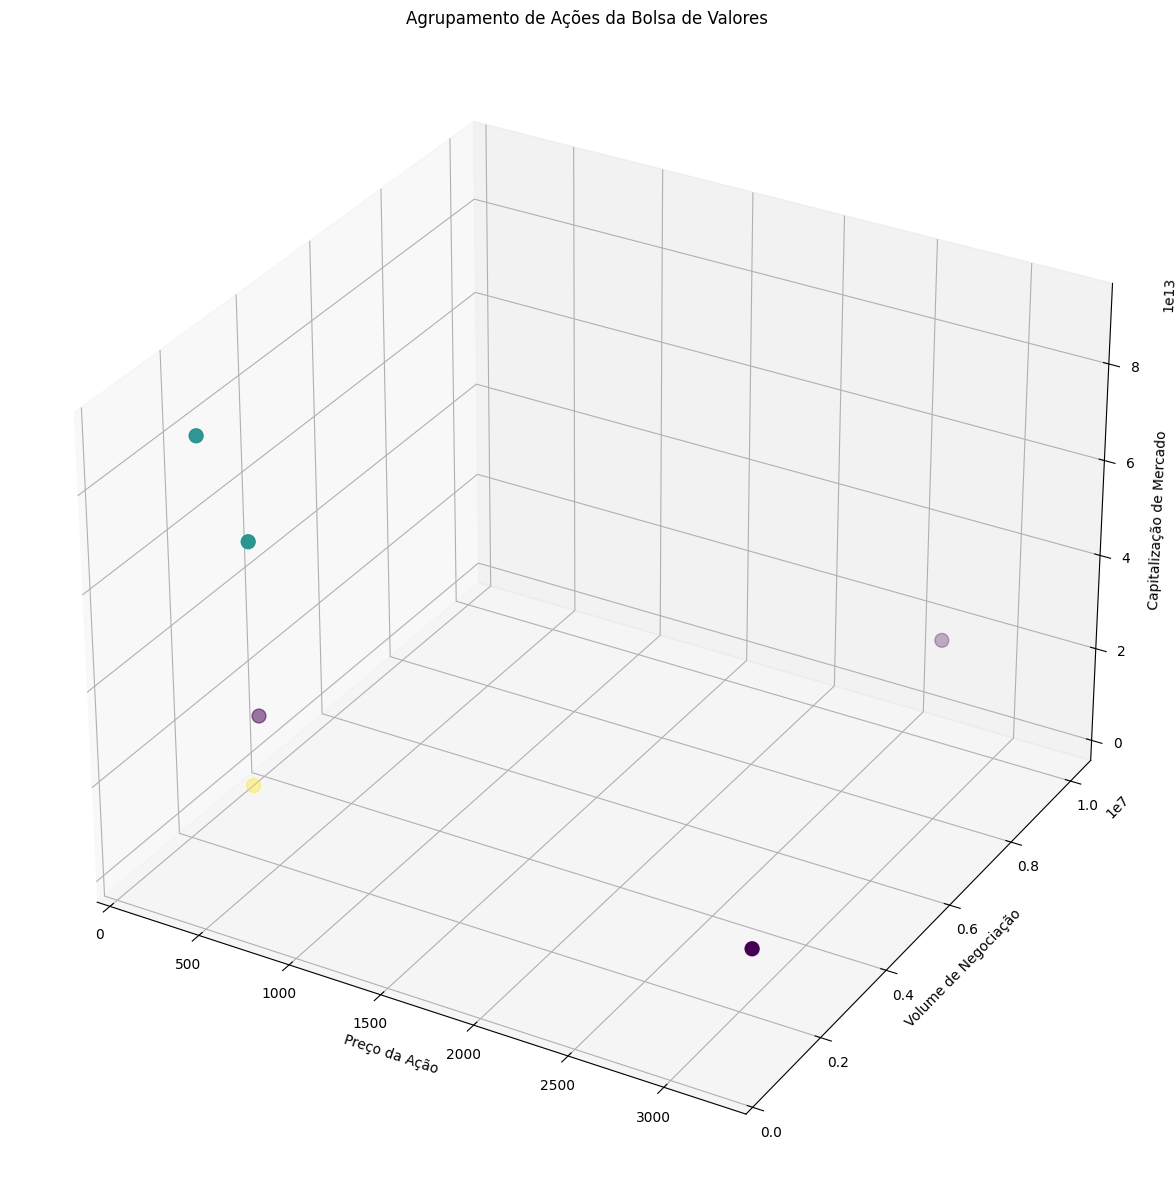

  Simbolo  Preço da Ação  Volume de Negociação  Capitalização de Mercado  \
0    AAPL         150.12               3000000              2.000000e+12   
1   GOOGL        2700.45              10000000              1.800000e+13   
2    MSFT         300.89               2500000              2.200000e+13   
3    AMZN        3200.10               1200000              1.700000e+13   
4    TSLA         700.78                500000              7.500000e+13   
5      FB         350.40                900000              9.000000e+13   

   Cluster  
0        2  
1        0  
2        0  
3        0  
4        1  
5        1  


In [8]:
# Visualizando os grupos formados em um gráfico 3d
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X['Preço da Ação'],X['Volume de Negociação'],X['Capitalização de Mercado'],
           c = kmeans.labels_,s=100)
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Volume de Negociação')
ax.set_zlabel('Capitalização de Mercado')
plt.title('Agrupamento de Ações da Bolsa de Valores')
plt.show()
print(df) # Analise dos clusters formados

<Axes: xlabel='Simbolo', ylabel='Preço da Ação'>

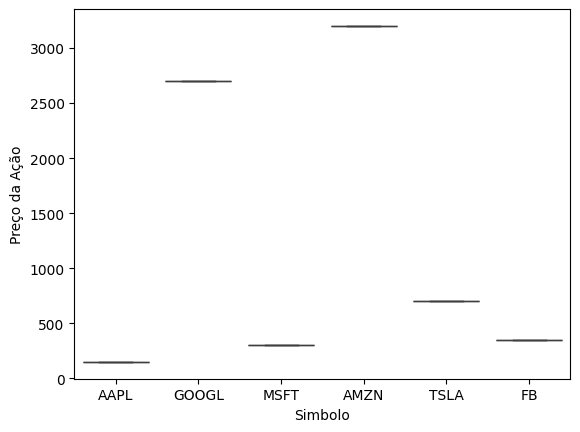

In [9]:
sns.boxplot(x= df['Simbolo'],y=df['Preço da Ação'])


In [10]:
# cria uma variavel 
dados_ativos = pd.get_dummies(df,columns=['Simbolo'])

In [11]:
# Exibe os dados ativos
dados_ativos.head()

,Preço da Ação,Volume de Negociação,Capitalização de Mercado,Cluster,Simbolo_AAPL,Simbolo_AMZN,Simbolo_FB,Simbolo_GOOGL,Simbolo_MSFT,Simbolo_TSLA
0,150.12,3000000,2.000000e+12,2,True,False,False,False,False,False
1,2700.45,10000000,1.800000e+13,0,False,False,False,True,False,False
2,300.89,2500000,2.200000e+13,0,False,False,False,False,True,False
3,3200.10,1200000,1.700000e+13,0,False,True,False,False,False,False
4,700.78,500000,7.500000e+13,1,False,False,False,False,False,True


In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dados_ativos)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [13]:
# Printando na tela o resultado da inercia
sse = kmeans.inertia_
print(f'SSE:{sse}')

SSE:1.4000000000045128e+25


In [14]:
# Visualizando os agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

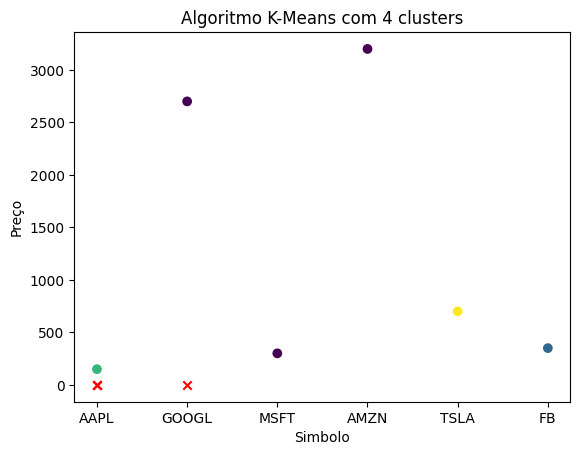

In [15]:
# Plotando as visualizações
plt.scatter(data['Simbolo'],data['Preço da Ação'],c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')
plt.xlabel('Simbolo')
plt.ylabel('Preço')
plt.title('Algoritmo K-Means com 4 clusters')
plt.savefig('Grafico 4 clusters.png')
plt.show()